<a href="https://colab.research.google.com/github/SantiagoGarciaC/diplomado_ML/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.


# 5. Taller SVM

Los datos que vamos a analizar consisten en imagenes de tamaño pixeles 8x8, que contienen los dígitos del 0 al 9. El dataset, llamado *digits*, se encuentra disponible en la librería scikit-learn y consiste en 1797 imágenes mas su clasificación correspondiente. Las caráteristicas correponderán entonces a el valor de cada pixel en una escala de grises de 0-16, siendo 0 blanco y 16 negro. En este problema nos vamos a enfrentar entonces  a una clasificación multiclase.

Classes:	10 \\
Samples per class:	~180 \\
Samples total:	1797 \\
Dimensionality:	64 \\
Features:	integers 0-16

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm, metrics
from sklearn.svm import SVC

# The digits dataset
digits = datasets.load_digits()

**1.** Invoque el método `digits.DESCR` para ver la descripción del dataset.

In [ ]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

**2.** Explore los demás métodos que tiene el dataset de digits y su contenido.

In [ ]:
help(digits)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __se

In [ ]:
digits.items()

dict_items([('data', array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])), ('target', array([0, 1, 2, ..., 8, 9, 8])), ('frame', None), ('feature_names', ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_

In [ ]:
digits.values()

dict_values([array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), array([0, 1, 2, ..., 8, 9, 8]), None, ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

**3.** Use el comando de matplotlib `plt.imshow()` para visualizar la primera imagen. Note que para tener una visualización correcta debe estar en escala de grises.

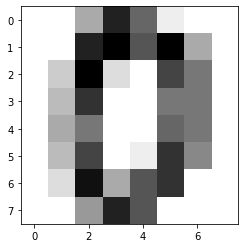

In [ ]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


Antes de realizar la clasificación, debemos convertir las matrices en vectores, de tal forma que cada una de las entradas de los vectores corresponda a una característica.

**4.** Utilize el método correspondiente para convertir las imagenes que corresponden a matrices 8x8 en vectores con tamaño 64.

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
convert_data = np.array([item.reshape(64) for item in digits.images]) 

In [ ]:
np.all(convert_data==digits.data)

True

**5.** Como primera aproximación, implemente un clasificador de máquina de soporte vectorial (SVC) con la configuración que trae por defecto, es decir, $C=1$, kernel=`'rbf'` y $\gamma=$`'auto'`.

In [ ]:
clf = SVC(C=1, kernel='rbf', gamma='auto')

**6.** Utilice la primera mitad de los datos para entrenar el modelo o la otra mitad para realizar el test. Realice el entrenamiento del modelo y a partir de este calcule los valores predichos para el set de pruebas.

In [ ]:
X = digits.data
y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=1)
clf.fit(X_train,y_train)
print('El score del SVC es %.2f' %clf.score(X_test,y_test))


El score del SVC es 0.24


### Predicciones para los datos de test

In [ ]:
preds = clf.predict(X_test)

Ahora, usando las métricas para clasificación, analicemos la calidad de los resultados obtenidos.

Text(33.0, 0.5, 'True')

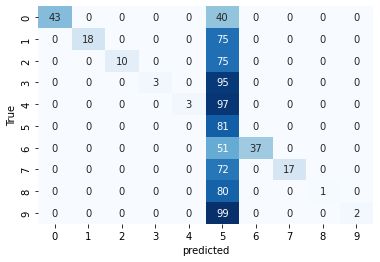

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, preds)
sns.heatmap(confusion, annot=True, cbar=False, cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('True')

### Se observan demasiadas predicciones para el valor de 5 cuando este no es el valor real

In [ ]:
print('El %.2f del total de predicciones predicen el número 5' %(np.mean(preds == 5)*100))

El 85.09 del total de predicciones predicen el número 5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        83
           1       1.00      0.19      0.32        93
           2       1.00      0.12      0.21        85
           3       1.00      0.03      0.06        98
           4       1.00      0.03      0.06       100
           5       0.11      1.00      0.19        81
           6       1.00      0.42      0.59        88
           7       1.00      0.19      0.32        89
           8       1.00      0.01      0.02        81
           9       1.00      0.02      0.04       101

    accuracy                           0.24       899
   macro avg       0.91      0.25      0.25       899
weighted avg       0.92      0.24      0.24       899



**7.** Realice una curva de validación para valores de $\gamma$ entre $10^{-6}$ y $10^{-1}$. Encuentre el valor de $\gamma$ que entrega el modelo óptimo. *Nota*: para poder visualizar los datos use escala logaritmica. 

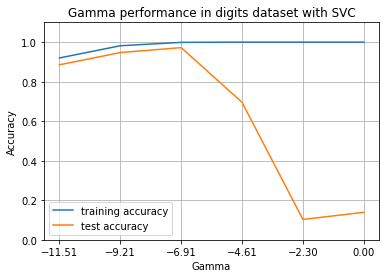

In [ ]:
from sklearn.model_selection import validation_curve
gamma_settings = np.array([10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1])
train_score, val_score = validation_curve(SVC(), X, y, param_name='gamma', param_range=gamma_settings , cv=5)

plt.title('Gamma performance in digits dataset with SVC')
plt.plot(np.log(gamma_settings), np.mean(train_score,1), label="training accuracy")
plt.plot(np.log(gamma_settings), np.mean(val_score,1), label="test accuracy")
plt.xticks(np.log(gamma_settings))
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.grid()
plt.legend()

Vemos que para $\gamma=10^{-4}$ se obtiene el de mayor score de prueba y con un alto score de entrenamiento. Lo cual nos indica que para este conjunto de parámetros hemos obtenido el modelo optimo en dicho valor de $\gamma$. 

**8.** Realice nuevamente la clasificación usando este nuevo modelo y compare con los  resultados obtenidos en el punto 6.

In [ ]:
model = SVC(C=1, kernel='rbf', gamma=10e-4)
model.fit(X_train,y_train)
print('El score del mejor modelo de SVC es %.2f' %model.score(X_test,y_test))

El score del mejor modelo de SVC es 0.99


### Matriz de confusión

Text(33.0, 0.5, 'True')

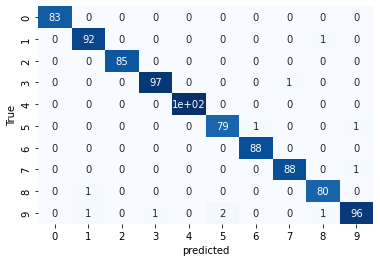

In [ ]:
best_preds = model.predict(X_test)
confusion = confusion_matrix(y_test, best_preds)
sns.heatmap(confusion, annot=True, cbar=False, cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('True')

### Métricas de clasificación

In [ ]:
print(classification_report(y_test, best_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.98      0.99      0.98        93
           2       1.00      1.00      1.00        85
           3       0.99      0.99      0.99        98
           4       1.00      1.00      1.00       100
           5       0.98      0.98      0.98        81
           6       0.99      1.00      0.99        88
           7       0.99      0.99      0.99        89
           8       0.98      0.99      0.98        81
           9       0.98      0.95      0.96       101

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



**9.** Construya un resultado en que se entreguen 4 imagenes del dataset, junto con el valor de la predicción y el valor real al que corresponde. 

Se crea la función para que siempre se corra con 4 imagenes escogidas de forma aleatoria

In [ ]:
def result_four_images(X,y,model):
    random_vals = np.array([np.random.randint(X.shape[0]) for i in range(4)])
    predicts = model.predict(X)
    for item in random_vals:
        print('La predicción de la imagen', item ,'es', predicts[item],'y el valor real es', y[item]) 


In [ ]:
result_four_images(X,y,model)

La predicción de la imagen 214 es 2 y el valor real es 2
La predicción de la imagen 1514 es 1 y el valor real es 1
La predicción de la imagen 1054 es 5 y el valor real es 5
La predicción de la imagen 387 es 1 y el valor real es 1


**10.** Con base en los resultados, ¿Qué podemos decir de los conjuntos de prueba y entrenamiento que se usaron en el punto 6? ¿Cuál es la partición óptima de los datatset de entrenamiento y prueba?

Para responder este punto voy a construir una curva de aprendizaje modificando la propoción del test size en los splits para entrenamiento y test

In [ ]:
def plot_learning_curve(estimator,X,y,cv): 
  from sklearn.model_selection import learning_curve
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, shuffle=True)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  # Plot learning curve
  plt.grid()
  plt.fill_between(
          train_sizes,
          train_scores_mean - train_scores_std,
          train_scores_mean + train_scores_std,
          alpha=0.1,
          color="r",
      )
  plt.fill_between(
          train_sizes,
          test_scores_mean - test_scores_std,
          test_scores_mean + test_scores_std,
          alpha=0.1,
          color="g",
      )
  plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="train score")
  plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="test score")
  plt.legend(loc="lower right")
  plt.ylabel("Score")
  plt.xlabel("Training examples")
  plt.title(estimator.__class__.__name__ + ' with gamma = ' + str(estimator.get_params()['gamma']))
  return plt.show()

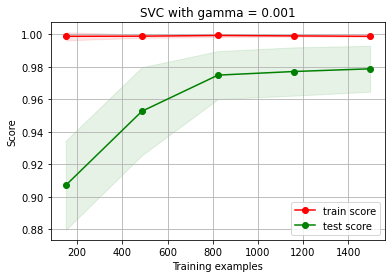

In [ ]:
plot_learning_curve(model,X,y,cv=6)

In [ ]:
best_train_size = (1150/X.shape[0])*100
best_test_size = 100-best_train_size
print('Proporción óptima para entrenamiento %.1f y test %.1f' %(best_train_size,best_test_size))

Proporción óptima para entrenamiento 64.0 y test 36.0


La partición óptima de train y test corresponde al punto donde se aplana la curva de aprendizaje, lo cual son 1150 datos aproximadamente o el 64% de datos para entrenamiento; pero no más de ahí, dado que al aumentar más la proporción con la cual se entrenan los datos en ese punto, el score de los datos de prueba no mejora significativamente, lo cual quiere decir que con esa cantidad de datos el modelo quedó entrenado lo suficientemente bien y no se necesita una proporción mayor de datos de entrenamiento para mejorar rendimiento del modelo con datos no vistos, lo cual al fin y al cabo nos quiere decir que cantidad no es igual a calidad